# EDA League of legends dataset

EDA of 1/8 of the full dataset
The purpose of this EDA is to find insights which will serve us later in another notebook for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm.

# I/ Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
from IPython.display import Markdown
from IPython.display import display
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
import sys
import time
sys.path.insert(0, '/home/apprenant/Documents/simplon_dev/python_sql/lol_api') # Change with your own project path

plt.style.use('bmh')

pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.1f' % x) #print float as int

def md(input):
    display(Markdown(input))

def check(input):
    return md(f"☑️ **{input}**")



# II/ Import Dataset

In [3]:
CSV_PATH = 'Data/dataclear.csv'

def load_csv(file_path):
    """
    Load CSV file and print out the execution time

    Parameter : CSV file path

    Return : Returns a Dataframe
    """
    start_time = time.time()
    df = pd.read_csv(file_path, error_bad_lines=False, low_memory=False, nrows = None)
    check('Import the dataset successful')
    print("⏰ Execution time : %s seconds" % round((time.time() - start_time), 2))
    return df

df = load_csv(CSV_PATH)

☑️ **Import the dataset successful**

⏰ Execution time : 0.7 seconds


# III/ EDA

## Basics infos about the dataframe

In [4]:
# Display the first five rows
check('Read the ten first lines of the dataframe')
df.head(10)

☑️ **Read the ten first lines of the dataframe**

,Unnamed: 0,Unnamed: 0.1,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,...,assist_10,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,sbireskill_10,jungsbirekill_10
0,0,0,5347224058,0,Blue,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,5347224058,1,Blue,0,0,0,0,0,...,0,1055,2003,0,0,0,0,3340,0,0
2,2,2,5347224058,2,Blue,0,0,0,0,0,...,0,1055,2003,0,0,0,0,3340,0,0
3,3,3,5347224058,3,Blue,0,0,0,0,0,...,0,1055,2003,0,0,0,0,3340,3,0
4,4,4,5347224058,4,Blue,0,0,0,0,0,...,0,1055,0,0,0,0,0,3340,4,0
5,5,5,5347224058,5,Blue,0,0,0,0,0,...,0,1055,3070,1001,0,0,0,3340,5,0
6,6,6,5347224058,6,Blue,0,0,0,0,0,...,0,1055,3070,1001,0,0,0,3340,8,0
7,7,7,5347224058,7,Blue,0,0,0,0,0,...,1,1055,3070,1001,3057,1036,0,3340,9,0
8,8,8,5347224058,8,Blue,0,0,0,0,0,...,2,1055,3070,1001,3057,1036,0,3340,11,0
9,9,9,5347224058,9,Blue,0,0,0,0,0,...,2,1055,3070,1001,3057,1036,0,3340,13,0


In [5]:
check('Drop the Unnamed: 0 column')
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

☑️ **Drop the Unnamed: 0 column**

In [6]:
# Display the last five rows
check('Read the ten last lines of the dataframe')
df.tail(10)

☑️ **Read the ten last lines of the dataframe**

,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,blue_kill_ancient_drake,...,assist_10,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,sbireskill_10,jungsbirekill_10
30001,5376359606,21,Red,0,0,0,0,0,1,0,...,2,2033,3070,1058,3020,0,3157,3340,18,0
30002,5376359606,22,Red,0,0,0,0,0,1,0,...,2,2033,3070,1058,3020,1052,3157,3340,18,0
30003,5376359606,23,Red,0,0,0,0,0,1,0,...,2,2033,2055,0,3020,0,3003,3363,18,0
30004,5376359606,24,Red,0,0,0,0,0,1,0,...,2,2033,2055,0,3020,0,3003,3363,19,0
30005,5376359606,25,Red,0,0,1,0,0,1,0,...,2,2033,0,0,3020,0,3003,3363,20,0
30006,5376359606,26,Red,0,0,1,0,0,1,0,...,3,2033,2055,0,3020,0,3003,3363,20,0
30007,5376359606,27,Red,0,0,1,0,0,1,0,...,4,2033,2055,0,3020,0,3003,3363,21,0
30008,5376359606,28,Red,0,0,1,0,0,1,0,...,4,2033,1058,0,3020,0,3003,3363,21,0
30009,5376359606,29,Red,0,0,1,0,0,1,0,...,4,2033,1058,0,3020,0,3003,3363,22,0
30010,5376359606,30,Red,0,0,1,0,0,1,0,...,5,2033,1058,0,3020,0,3003,3363,22,0


In [7]:
check('Print the shape of the dataframe')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

☑️ **Print the shape of the dataframe**

There are 30011 rows and 173 columns


In [8]:
check('Using .info() to get infos on the df')
df.info()

☑️ **Using .info() to get infos on the df**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Columns: 173 entries, match_ID to jungsbirekill_10
dtypes: int64(170), object(3)
memory usage: 39.6+ MB


☑️ **Display the data type repartition**

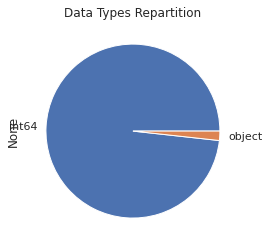

In [9]:
check('Display the data type repartition')
sns.set_theme(style="whitegrid")
df.dtypes.value_counts().plot.pie()
plt.title("Data Types Repartition")
plt.show()

In [10]:
# Checking missing values
check('Checking for missing values')
print("Null values summary:\n{}\n".format(df.isna().sum()))
print("No null values found, data clean!" if (not df.isna().sum().all()) else "Data needs cleaning..." )

☑️ **Checking for missing values**

Null values summary:
match_ID                   0
timeline                   0
who_win                    0
blue_kill_nashor           0
blue_kill_herald           0
blue_kill_fire_drake       0
blue_kill_air_drake        0
blue_kill_water_drake      0
blue_kill_earth_drake      0
blue_kill_ancient_drake    0
blue_soul_drake            0
blue_destr_tower           0
blue_gold                  0
red_kill_nashor            0
red_kill_herald            0
red_kill_fire_drake        0
red_kill_air_drake         0
red_kill_water_drake       0
red_kill_earth_drake       0
red_kill_ancient_drake     0
red_soul_drake             0
red_destr_tower            0
red_gold                   0
champion_1                 0
level_1                    0
gold_1                     0
kill_1                     0
death_1                    0
assist_1                   0
item1_1                    0
item2_1                    0
item3_1                    0
item4_1                    0
item5_1               

In [11]:
check('Number of matches in total')
number_of_match = len(df['match_ID'].unique())
print(f'There are {number_of_match} different matches recorded')

☑️ **Number of matches in total**

There are 1072 different matches recorded


## Checking the target variable

Now lets take a look at how the target variable is distributed (who_wins)

In [12]:
print(df['who_win'].describe())

count     30011
unique        2
top        Blue
freq      15308
Name: who_win, dtype: object


In [13]:
red_win = df['who_win'].value_counts()[0]
blue_win  = df['who_win'].value_counts()[1]

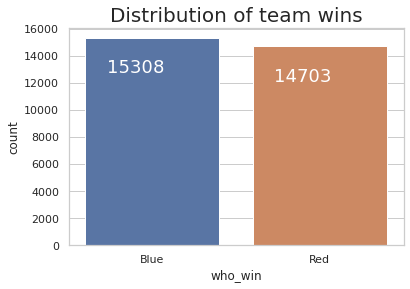

In [14]:
ax = sns.countplot(x=df['who_win'], data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=18)
ax.set_title('Distribution of team wins', fontsize=20)
plt.show()

## Checking unique values of each columns

In [15]:
def get_df_uniques(df):
    start_time = time.time()
    attFeatures = []
    for col in df.columns:
        attFeatures.append(
            [col, df[col].dtype, df[col].nunique(), 
            df[col].drop_duplicates().values]
        )
    print("⏰ Execution time : %s seconds" % round((time.time() - start_time), 2))
    return pd.DataFrame(attFeatures, columns = ['Features', 'Dtype', 'Uniques count', 'Values'])

get_df_uniques(df)

⏰ Execution time : 0.22 seconds


,Features,Dtype,Uniques count,Values
0,match_ID,int64,1072,"[5347224058, 5377941123, 5394394949, 538621273..."
1,timeline,int64,49,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,who_win,object,2,"[Blue, Red]"
3,blue_kill_nashor,int64,1,[0]
4,blue_kill_herald,int64,34,"[0, 18, 11, 19, 9, 12, 28, 13, 7, 8, 17, 5, 10..."
5,blue_kill_fire_drake,int64,4,"[0, 1, 2, 3]"
6,blue_kill_air_drake,int64,3,"[0, 1, 2]"
7,blue_kill_water_drake,int64,4,"[0, 1, 2, 3]"
8,blue_kill_earth_drake,int64,4,"[0, 1, 2, 3]"
9,blue_kill_ancient_drake,int64,1,[0]


In [16]:
check('We remove the columns with only one unique value as it won\t be meaningful for the analysis')

def remove_cols_with_unique_values(df):
    """
    Remove all columns with only one unique value
    Parameter : Dataframe
    Return : List of dataframe columns
    """
    cols = []
    for col in df.columns:
        if len(df[col].unique()) > 1:
            cols.append(col)

    return cols
        
cols = remove_cols_with_unique_values(df)
cols_deleted = [col for col in df if len(df[col].unique()) <= 1]
print(f'{len(cols)} columns left : {cols}')
print(f'{len(cols_deleted)} columns deleted {cols_deleted}')

df = df[cols]

df.head()

☑️ **We remove the columns with only one unique value as it won	 be meaningful for the analysis**

169 columns left : ['match_ID', 'timeline', 'who_win', 'blue_kill_herald', 'blue_kill_fire_drake', 'blue_kill_air_drake', 'blue_kill_water_drake', 'blue_kill_earth_drake', 'blue_soul_drake', 'blue_destr_tower', 'blue_gold', 'red_kill_herald', 'red_kill_fire_drake', 'red_kill_air_drake', 'red_kill_water_drake', 'red_kill_earth_drake', 'red_soul_drake', 'red_destr_tower', 'red_gold', 'champion_1', 'level_1', 'gold_1', 'kill_1', 'death_1', 'assist_1', 'item1_1', 'item2_1', 'item3_1', 'item4_1', 'item5_1', 'item6_1', 'trinket_1', 'sbireskill_1', 'jungsbirekill_1', 'champion_2', 'level_2', 'gold_2', 'kill_2', 'death_2', 'assist_2', 'item1_2', 'item2_2', 'item3_2', 'item4_2', 'item5_2', 'item6_2', 'trinket_2', 'sbireskill_2', 'jungsbirekill_2', 'champion_3', 'level_3', 'gold_3', 'kill_3', 'death_3', 'assist_3', 'item1_3', 'item2_3', 'item3_3', 'item4_3', 'item5_3', 'item6_3', 'trinket_3', 'sbireskill_3', 'jungsbirekill_3', 'champion_4', 'level_4', 'gold_4', 'kill_4', 'death_4', 'assist_4', '

,match_ID,timeline,who_win,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,blue_soul_drake,blue_destr_tower,...,assist_10,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,sbireskill_10,jungsbirekill_10
0,5347224058,0,Blue,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5347224058,1,Blue,0,0,0,0,0,0,0,...,0,1055,2003,0,0,0,0,3340,0,0
2,5347224058,2,Blue,0,0,0,0,0,0,0,...,0,1055,2003,0,0,0,0,3340,0,0
3,5347224058,3,Blue,0,0,0,0,0,0,0,...,0,1055,2003,0,0,0,0,3340,3,0
4,5347224058,4,Blue,0,0,0,0,0,0,0,...,0,1055,0,0,0,0,0,3340,4,0


In [17]:
check('Checking if the amount of gold for both team at the start (timeline 0) is the same for each game')

avg_blue_gold_at_timeline_zero = df['blue_gold'][df['timeline'] == 0].sum() / len(df['match_ID'].unique())
avg_red_gold_at_timeline_zero = df['red_gold'][df['timeline'] == 0].sum() / len(df['match_ID'].unique())

print(f'Total gold for the blue team at timeline 0 : {avg_blue_gold_at_timeline_zero}g')
print(f'Total gold for the red team at timeline 0 : {avg_red_gold_at_timeline_zero}g')

☑️ **Checking if the amount of gold for both team at the start (timeline 0) is the same for each game**

Total gold for the blue team at timeline 0 : 2500.0g
Total gold for the red team at timeline 0 : 2500.0g


In [18]:
def get_corr_pairs(df, size, thresh):
    s = df.corr().abs().unstack().sort_values(ascending=False)
    s = s[s.values < 1]
    for i in range(size*2):
        print(s[i])
        if s[i] < thresh:
            if i % 2 == 0:
                print("{:.5f} {}".format(s[i], s.index[i]))

get_corr_pairs(df,50, 0.85)

0.9861102960765373
0.9861102960765373
0.985864946295785
0.985864946295785
0.9790012566758092
0.9790012566758092
0.9782052884454919
0.9782052884454919
0.9776814089158822
0.9776814089158822
0.9767966562948358
0.9767966562948358
0.9760697863400778
0.9760697863400778
0.9757351024937635
0.9757351024937635
0.9757000947222791
0.9757000947222791
0.9751894150335647
0.9751894150335647
0.974441397444752
0.974441397444752
0.9744231488180695
0.9744231488180695
0.9740407905145506
0.9740407905145506
0.9738580431305349
0.9738580431305349
0.9738148452100077
0.9738148452100077
0.9737638419955961
0.9737638419955961
0.973505540326839
0.973505540326839
0.9733847354051656
0.9733847354051656
0.973279337560852
0.973279337560852
0.9725147337047974
0.9725147337047974
0.9720088242272531
0.9720088242272531
0.9720047474818894
0.9720047474818894
0.9719998785643406
0.9719998785643406
0.9718172509827409
0.9718172509827409
0.9716518379822943
0.9716518379822943
0.9715406278239153
0.9715406278239153
0.9715293441101852
0

In [19]:
df.corr()

,match_ID,timeline,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,blue_destr_tower,blue_gold,red_kill_herald,...,assist_10,item1_10,item2_10,item3_10,item4_10,item5_10,item6_10,trinket_10,sbireskill_10,jungsbirekill_10
match_ID,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
timeline,0.0,1.0,-0.0,0.4,0.4,0.4,0.4,0.7,1.0,0.6,...,0.7,0.2,0.3,0.4,0.4,0.5,0.6,0.3,0.6,0.1
blue_kill_herald,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
blue_kill_fire_drake,0.0,0.4,-0.0,1.0,0.1,0.1,0.1,0.4,0.4,0.2,...,0.2,0.1,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.0
blue_kill_air_drake,0.0,0.4,-0.0,0.1,1.0,0.2,0.1,0.4,0.4,0.2,...,0.3,0.1,0.1,0.1,0.2,0.2,0.2,0.1,0.2,0.1
blue_kill_water_drake,0.0,0.4,-0.0,0.1,0.2,1.0,0.1,0.4,0.4,0.2,...,0.2,0.1,0.1,0.2,0.1,0.2,0.2,0.1,0.2,0.1
blue_kill_earth_drake,0.0,0.4,-0.0,0.1,0.1,0.1,1.0,0.4,0.4,0.2,...,0.3,0.1,0.1,0.1,0.2,0.2,0.2,0.1,0.2,0.0
blue_destr_tower,0.0,0.7,-0.0,0.4,0.4,0.4,0.4,1.0,0.7,0.3,...,0.5,0.1,0.1,0.2,0.3,0.3,0.4,0.2,0.4,0.1
blue_gold,0.0,1.0,-0.0,0.4,0.4,0.4,0.4,0.7,1.0,0.6,...,0.7,0.2,0.3,0.4,0.4,0.5,0.6,0.3,0.6,0.1
red_kill_herald,0.0,0.6,-0.1,0.2,0.2,0.2,0.2,0.3,0.6,1.0,...,0.5,0.1,0.1,0.2,0.3,0.3,0.3,0.2,0.4,0.0


In [20]:
"""num_cols = [col for col in df if df[col].dtype != "object"]
df[num_cols].corr()["who_win"].sort_values(ascending = False)[1:11]"""

'num_cols = [col for col in df if df[col].dtype != "object"]\ndf[num_cols].corr()["who_win"].sort_values(ascending = False)[1:11]'

array([[<AxesSubplot:title={'center':'match_ID'}>,
        <AxesSubplot:title={'center':'timeline'}>,
        <AxesSubplot:title={'center':'blue_kill_herald'}>,
        <AxesSubplot:title={'center':'blue_kill_fire_drake'}>,
        <AxesSubplot:title={'center':'blue_kill_air_drake'}>,
        <AxesSubplot:title={'center':'blue_kill_water_drake'}>,
        <AxesSubplot:title={'center':'blue_kill_earth_drake'}>,
        <AxesSubplot:title={'center':'blue_destr_tower'}>,
        <AxesSubplot:title={'center':'blue_gold'}>,
        <AxesSubplot:title={'center':'red_kill_herald'}>,
        <AxesSubplot:title={'center':'red_kill_fire_drake'}>,
        <AxesSubplot:title={'center':'red_kill_air_drake'}>,
        <AxesSubplot:title={'center':'red_kill_water_drake'}>],
       [<AxesSubplot:title={'center':'red_kill_earth_drake'}>,
        <AxesSubplot:title={'center':'red_destr_tower'}>,
        <AxesSubplot:title={'center':'red_gold'}>,
        <AxesSubplot:title={'center':'champion_1'}>,
     

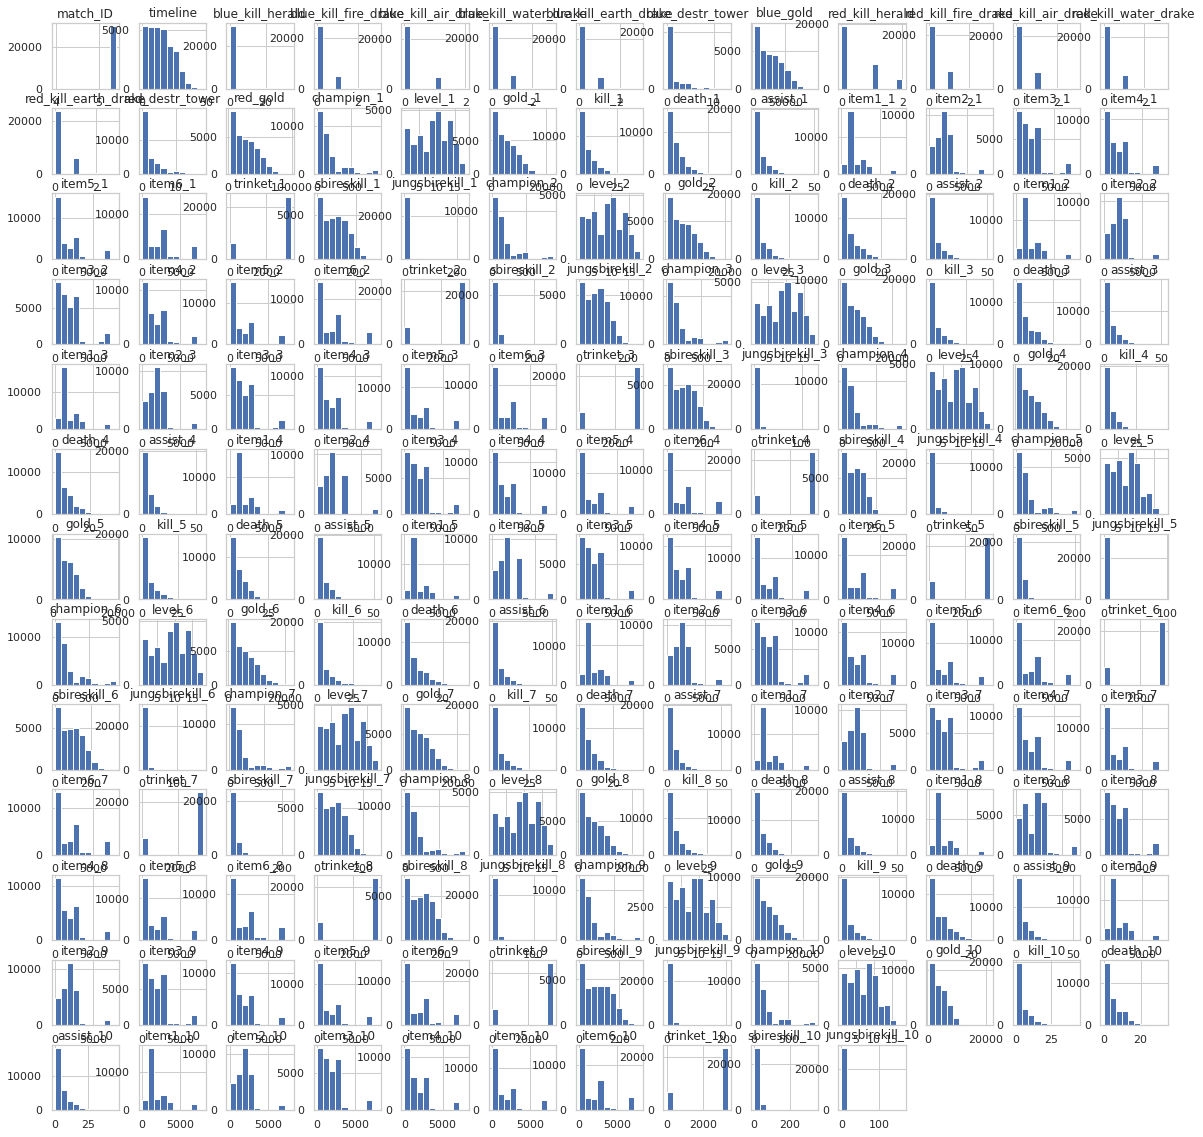

In [21]:
df.hist(figsize=(20,20))

## DESCRIBE OF THE GOLD_i variables (represent the gold earned by timeline by each player)

In [22]:
##############################
#  WARNING VALEURS NEGATIVES #
##############################

for i in range(1,11):
    print(f'⚠️ Describe gold of champion_{i}')
    print(df[f'gold_{i}'].describe())


⚠️ Describe gold of champion_1
count   30011.0
mean     5419.9
std      3888.6
min       500.0
25%      2082.0
50%      4795.0
75%      8123.5
max     22532.0
Name: gold_1, dtype: float64
⚠️ Describe gold of champion_2
count   30011.0
mean     5702.1
std      3945.9
min       500.0
25%      2292.0
50%      5215.0
75%      8493.5
max     20854.0
Name: gold_2, dtype: float64
⚠️ Describe gold of champion_3
count   30011.0
mean     5541.9
std      3978.2
min       500.0
25%      2120.0
50%      4937.0
75%      8276.5
max     24130.0
Name: gold_3, dtype: float64
⚠️ Describe gold of champion_4
count   30011.0
mean     5690.5
std      4139.1
min       500.0
25%      2161.0
50%      5024.0
75%      8489.5
max     24475.0
Name: gold_4, dtype: float64
⚠️ Describe gold of champion_5
count   30011.0
mean     4051.9
std      2753.7
min       500.0
25%      1677.0
50%      3711.0
75%      5994.0
max     19350.0
Name: gold_5, dtype: float64
⚠️ Describe gold of champion_6
count   30011.0
mean     5479

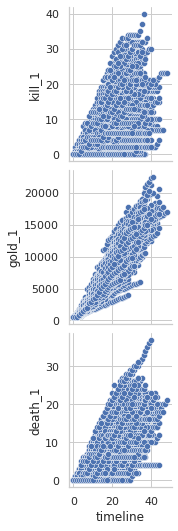

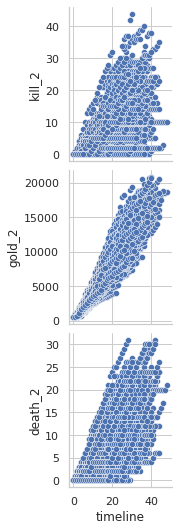

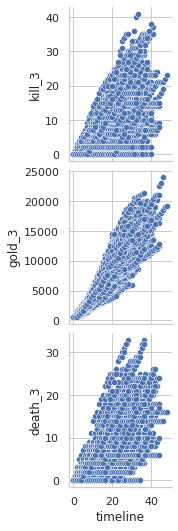

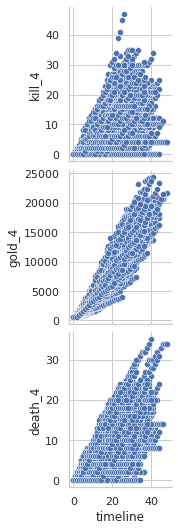

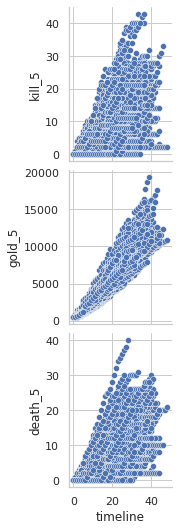

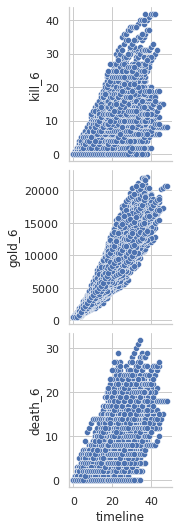

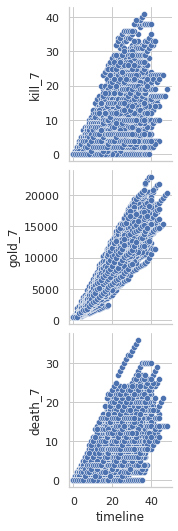

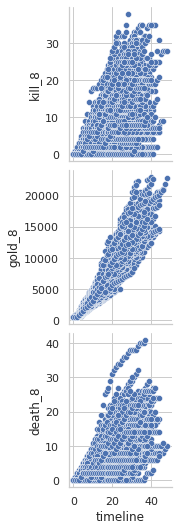

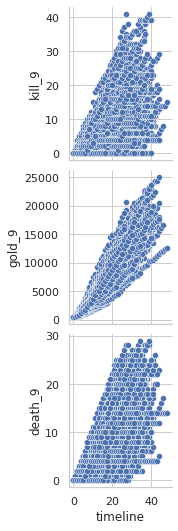

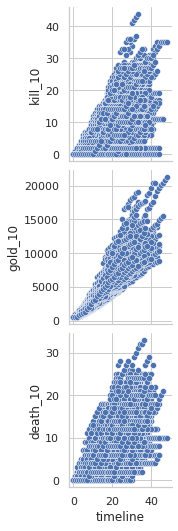

In [23]:
for i in range(1,11):
    sns.pairplot(df, x_vars= ["timeline"], y_vars = [f"kill_{i}", f"gold_{i}", f'death_{i}'])

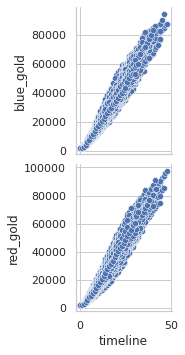

In [24]:
sns.pairplot(df, x_vars= ["timeline"], y_vars = ["blue_gold", "red_gold"])

<Figure size 1080x1080 with 0 Axes>

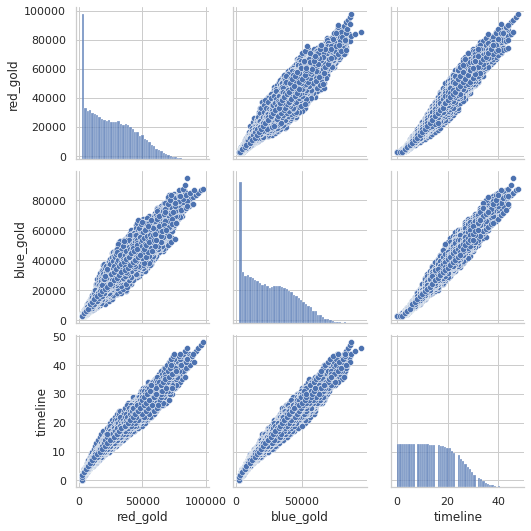

In [25]:
vars=['red_gold', 'blue_gold', 'timeline']
plt.figure(figsize=(15,15))
sns.pairplot(df,vars=vars)
plt.show()

# Heatmap showing correlated variables

<AxesSubplot:>

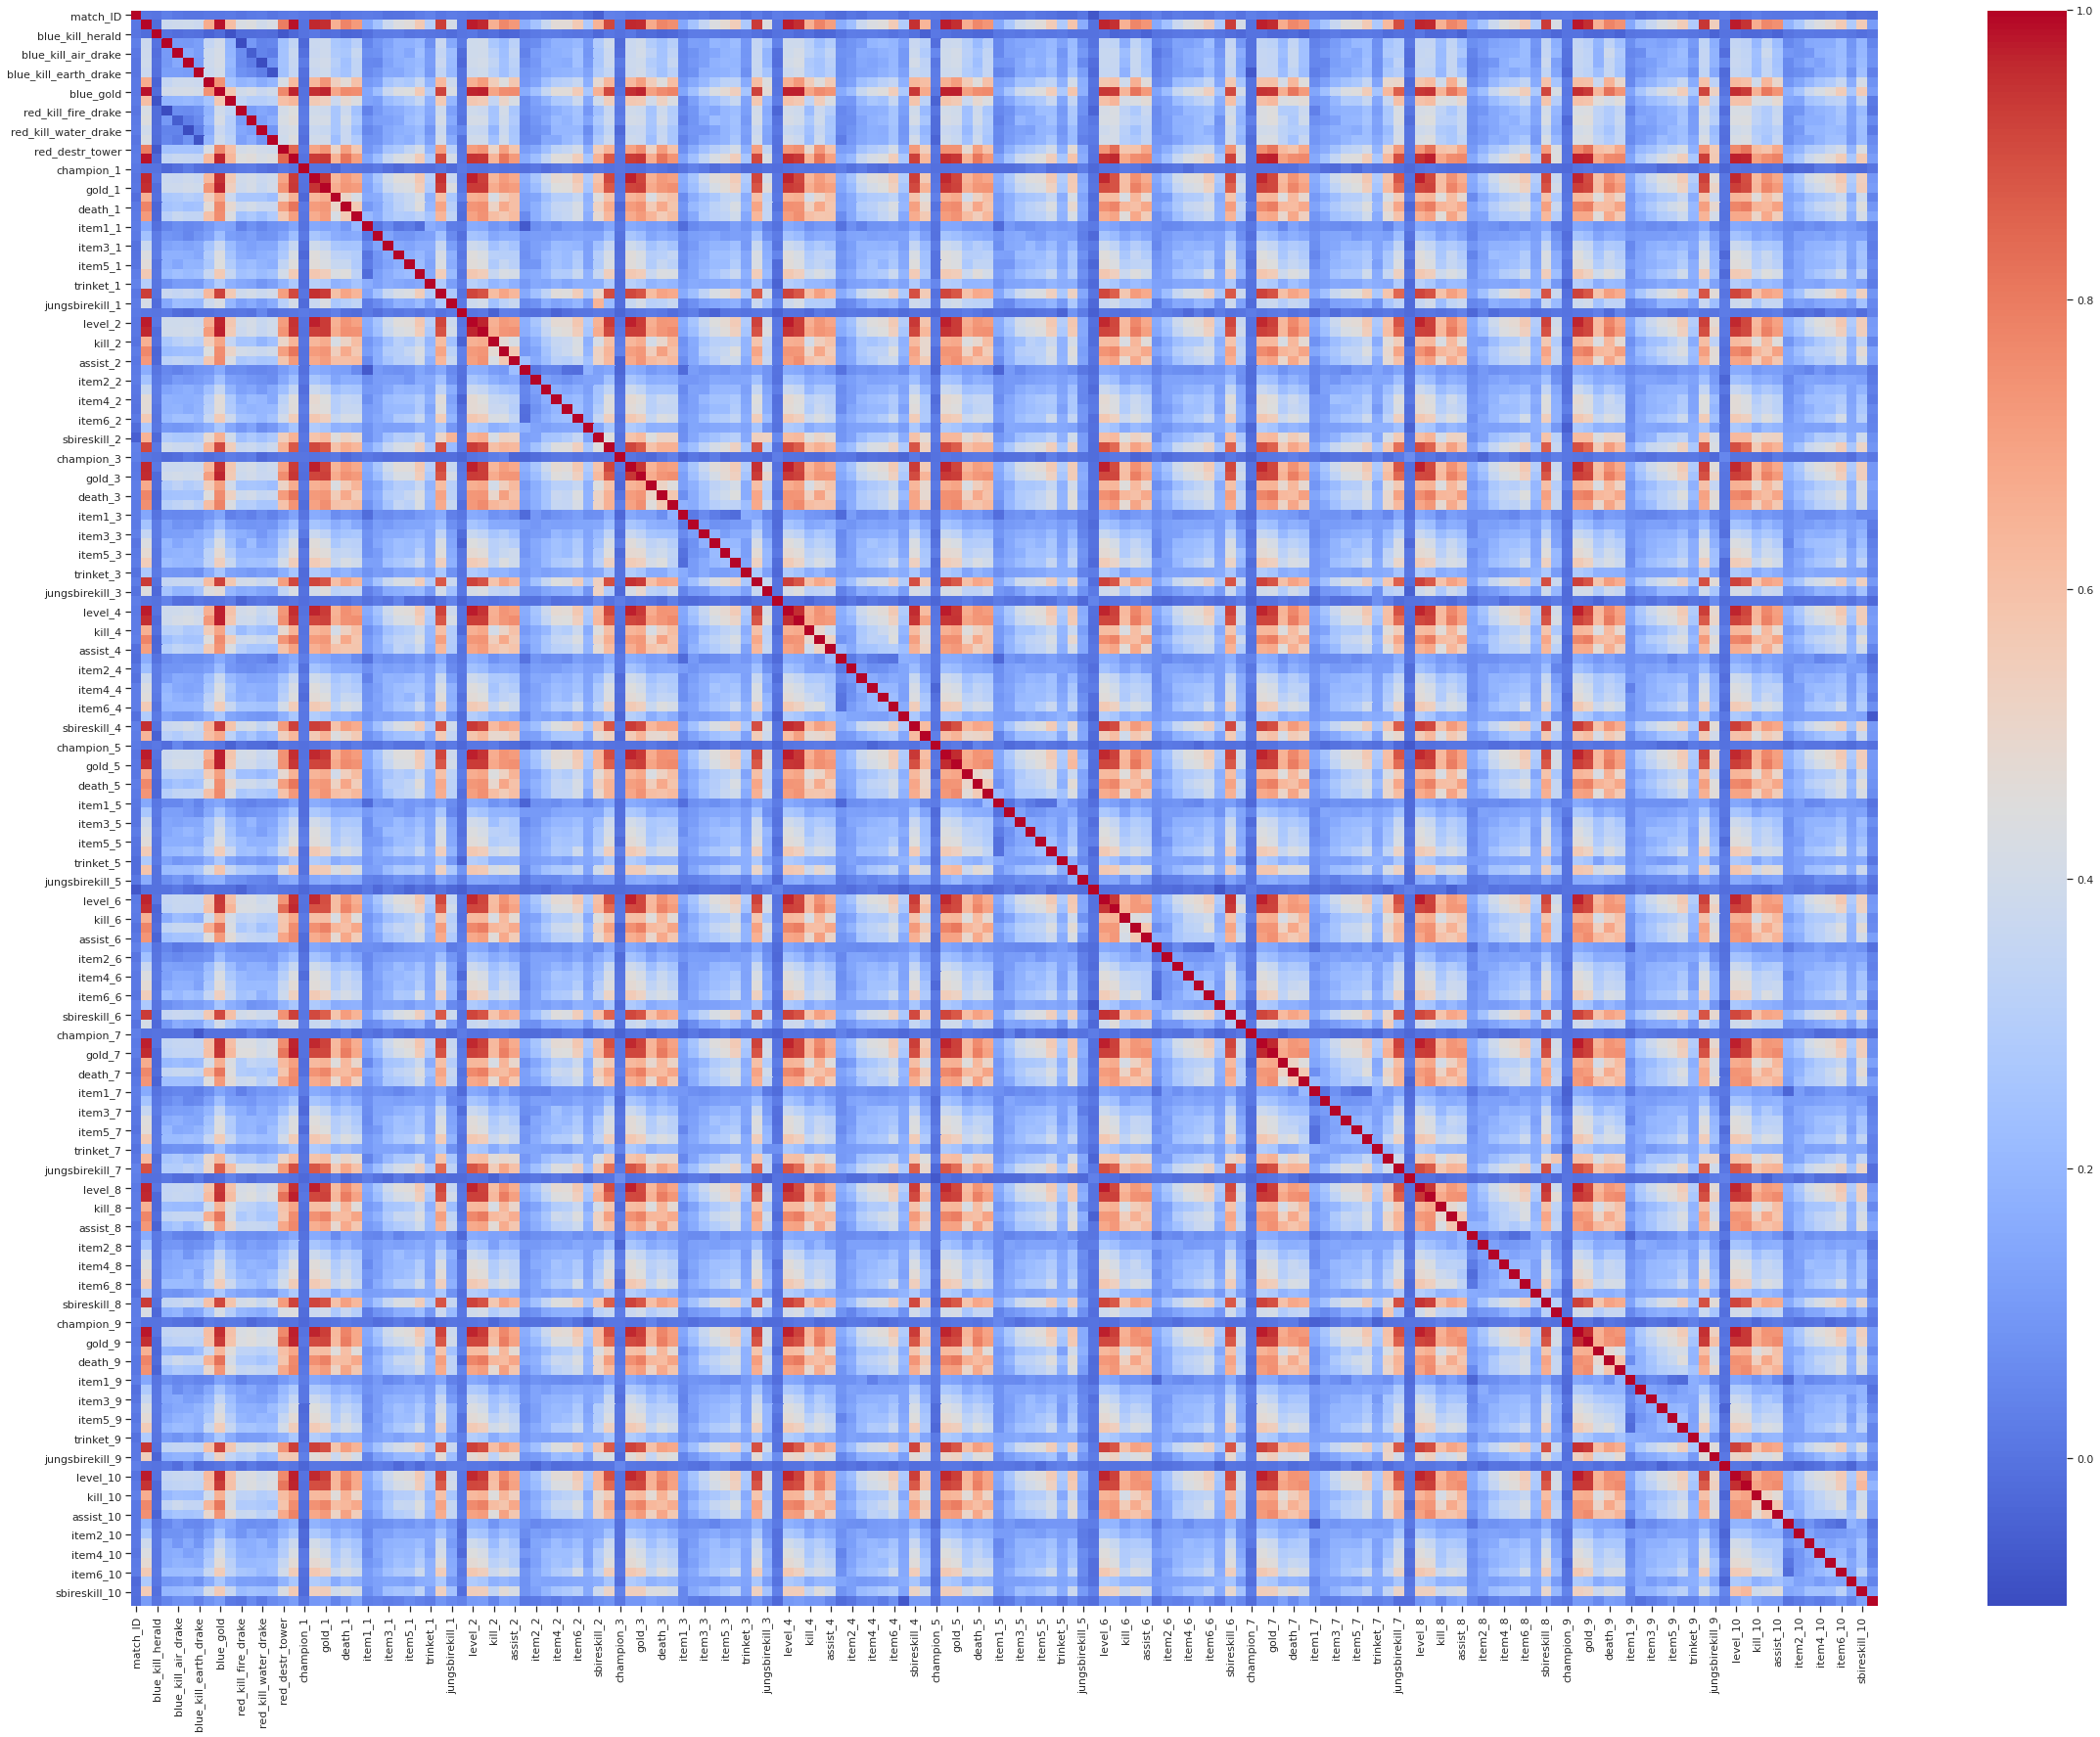

In [26]:
corr = df.corr()
plt.figure(figsize=(40,30))
plt.tick_params(left=True, bottom=True)
sns.heatmap(corr, cmap="coolwarm")

# Describe Blue kills and red kills by Timeline

In [27]:
df['blue_kills_by_timeline'] = df.loc[:,['kill_1', 'kill_2', 'kill_3', 'kill_4', 'kill_5']].sum(axis=1)
df['red_kills_by_timeline'] = df.loc[:,['kill_6', 'kill_7', 'kill_8', 'kill_9', 'kill_10']].sum(axis=1)

In [28]:
df['blue_kills_by_timeline'].describe()

count   30011.0
mean       22.1
std        19.6
min         0.0
25%         5.0
50%        18.0
75%        35.0
max       110.0
Name: blue_kills_by_timeline, dtype: float64

In [29]:
df['red_kills_by_timeline'].describe()

count   30011.0
mean       22.1
std        19.9
min         0.0
25%         5.0
50%        17.0
75%        35.0
max       117.0
Name: red_kills_by_timeline, dtype: float64

In [30]:
df['blue_gold'].describe()

count   30011.0
mean    26406.3
std     18164.1
min      2500.0
25%     10483.0
50%     24131.0
75%     39673.5
max     94655.0
Name: blue_gold, dtype: float64

In [31]:
df['red_gold'].describe()

count   30011.0
mean    26427.5
std     18317.9
min      2500.0
25%     10440.0
50%     23997.0
75%     39706.0
max     97719.0
Name: red_gold, dtype: float64

# EDA WITH ALL THE TIMELINES

In [32]:
blue_win = df[df['who_win'] == 'Blue']
red_win = df[df['who_win'] == 'Red']

## Win repartition by team

In [33]:
fig = go.Figure()

blue_loss = df[df['who_win'] == 'Red']

fig.add_trace(go.Bar(x=[0], y=list(blue_win['who_win'].value_counts()), name='Blue', marker_color='#084177', width=0.5))
fig.add_trace(go.Bar(x=[1], y=list(blue_loss['who_win'].value_counts()), name='Red',
                     marker_color=['#d63447'], width=0.5))

fig.update_layout(
    xaxis=dict(
        showticklabels=True,
        tickvals=[0, 1],
        ticktext=[i for i in ['Blue', 'Red']],
    ),
    yaxis_title='Wins',
    title='Wins From Each Team',
    height=800,
    width=800
)

iplot(fig)

## Distribution of Team kills when Winning and Losing

In [34]:
df['blue_kills_by_timeline'] = df.loc[:,['kill_1', 'kill_2', 'kill_3', 'kill_4', 'kill_5']].sum(axis=1)
df['red_kills_by_timeline'] = df.loc[:,['kill_6', 'kill_7', 'kill_8', 'kill_9', 'kill_10']].sum(axis=1)

fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blue_win['blue_kills_by_timeline']),
    go.Histogram(name='Blue Loss', x=red_win['blue_kills_by_timeline']),
    go.Histogram(name='Red Win', x=red_win['red_kills_by_timeline']),
    go.Histogram(name='Red Loss', x=blue_win['red_kills_by_timeline'])
])

fig.update_layout(
    title='Distribution of Team Kills when Winning and Losing',
    height=800,
    width=800,
)

iplot(fig)


## Average Kills of Teams when Winning and Losing

In [35]:
fig = go.Figure(data=[
    go.Bar(name='Blue Win', x=[0], y=[np.mean(blue_win['blue_kills_by_timeline'])], width=0.5),
    go.Bar(name='Blue Loss', x=[1], y=[np.mean(red_win['blue_kills_by_timeline'])], width=0.5),
    go.Bar(name='Red Win', x=[2], y=[np.mean(red_win['red_kills_by_timeline'])], width=0.5),
    go.Bar(name='Red Loss', x=[3], y=[np.mean(blue_win['red_kills_by_timeline'])], width=0.5)
])

fig.update_layout(
    title='Average Kills of Teams when Winning and Losing',
    height=800,
    width=800,
    xaxis=dict(
        tickvals=[i for i in range(4)],
        ticktext=[i for i in ['Blue Win', 'Blue Loss', 'Red Win', 'Red Loss']],
        showticklabels=False,
        title='Team'
    ),
)

iplot(fig)

## Average Deaths of Teams when Winning and Losing

In [36]:
df['blue_death_by_timeline'] = df.loc[:,['death_1', 'death_2', 'death_3', 'death_4', 'death_5']].sum(axis=1)
df['red_death_by_timeline'] = df.loc[:,['death_6', 'death_7', 'death_8', 'death_9', 'death_10']].sum(axis=1)

blue_win = df[df['who_win'] == 'Blue']
red_win = df[df['who_win'] == 'Red']


fig = go.Figure(data=[
    go.Bar(name='Blue Win', x=[0], y=[np.mean(blue_win['blue_death_by_timeline'])], width=0.5),
    go.Bar(name='Blue Loss', x=[1], y=[np.mean(red_win['blue_death_by_timeline'])], width=0.5),
    go.Bar(name='Red Win', x=[2], y=[np.mean(red_win['red_death_by_timeline'])], width=0.5),
    go.Bar(name='Red Loss', x=[3], y=[np.mean(blue_win['red_death_by_timeline'])], width=0.5)
])

fig.update_layout(
    title='Average Deaths of Teams when Winning and Losing',
    height=800,
    width=800,
    xaxis=dict(
        tickvals=[i for i in range(4)],
        ticktext=[i for i in ['Blue Win', 'Blue Loss', 'Red Win', 'Red Loss']],
        showticklabels=False,
        title='Team'
    ),
)

iplot(fig)

In [37]:

fig = go.Figure(data=[
    go.Violin(name='Blue Win', y=blue_win['blue_gold'], meanline_visible=True),
    go.Violin(name='Blue Loss', y=red_win['blue_gold'], meanline_visible=True),
    go.Violin(name='Red Win', y=red_win['red_gold'], meanline_visible=True),
    go.Violin(name='Red Loss', y=blue_win['red_gold'], meanline_visible=True),
])

fig.update_layout(
    title='Gold on Winning and Losing Teams',
    height=800,
    width=800,
)

iplot(fig)

In [38]:
import requests
def get_champions():
    r = requests.get('http://ddragon.leagueoflegends.com/cdn/10.10.3216176/data/en_US/champion.json')

    response = r.json()
    champions = []

    for champion in response['data']:
        id = response['data'][champion]['key']
        champ = champion
        champions.append({
            'id' : id,
            'champion' : champ   
        })
    return champions


list_champ = get_champions()
print(list_champ)




champs = ['champion_1', 'champion_2', 'champion_3', 'champion_4', 'champion_5',
          'champion_6', 'champion_7', 'champion_8', 'champion_9', 'champion_10']

for i in range(len(champs)):
    df[f'champion_{i + 1}_name'] =  

"""fig = go.Figure(data=[
    go.Pie(
        labels=list(champs_formatted.keys()),
        values=list(champs_formatted.values())
    )
])

fig.update_layout(
    height=900,
    width=800,
    title='Most Frequently Selected Champions'
)

iplot(fig)"""

SyntaxError: invalid syntax (<ipython-input-38-7a3306580428>, line 28)

# EDA WITH LAST TIMELINE (FINAL SCORES)

In [ ]:
# Dataframe with last timeline of each game
new_df = df.groupby('match_ID').tail(1)
new_df

,match_ID,timeline,who_win,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,blue_soul_drake,blue_destr_tower,...,item4_10,item5_10,item6_10,trinket_10,sbireskill_10,jungsbirekill_10,blue_kills_by_timeline,red_kills_by_timeline,blue_death_by_timeline,red_death_by_timeline
27,5347224058,27,Blue,0,0,1,0,2,0,8,...,3158,6694,3004,3340,27,0,59,64,68,70
55,5377941123,27,Red,0,0,0,0,0,0,3,...,1001,3814,1029,3364,41,0,40,74,78,44
88,5394394949,32,Blue,0,1,0,0,0,0,4,...,3047,3155,3071,0,18,0,50,48,49,52
119,5386212732,30,Red,0,0,0,1,0,0,0,...,3006,6671,3094,3363,55,4,55,101,112,58
149,5343055743,29,Blue,0,1,1,1,0,FIRE_DRAGON,8,...,0,3158,2065,3364,29,0,80,50,54,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29902,5383088402,31,Red,0,1,0,0,0,0,2,...,0,3050,2055,3364,29,0,41,45,49,46
29935,5379637480,32,Red,0,1,1,0,0,0,6,...,2031,0,4638,3364,56,0,45,61,66,50
29952,5344457819,16,Blue,0,0,0,0,1,0,5,...,2055,0,0,3364,0,0,34,8,8,38
29979,5390926620,26,Red,0,1,1,0,0,0,1,...,1036,6673,6676,3363,9,0,46,73,76,47


## WINS DISTRIBUTION

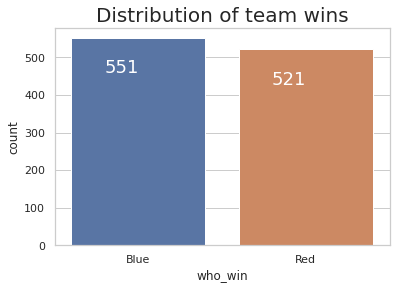

In [ ]:
ax = sns.countplot(x=new_df['who_win'], data=new_df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=18)
ax.set_title('Distribution of team wins', fontsize=20)
plt.show()

## GOLD ON WINNING AND LOSING TEAMS

In [ ]:
blue_win = new_df[new_df['who_win'] == 'Blue']
red_win = new_df[new_df['who_win'] == 'Red']

fig = go.Figure(data=[
    go.Violin(name='Blue Win', y=blue_win['blue_gold'], meanline_visible=True),
    go.Violin(name='Blue Loss', y=red_win['blue_gold'], meanline_visible=True),
    go.Violin(name='Red Win', y=red_win['red_gold'], meanline_visible=True),
    go.Violin(name='Red Loss', y=blue_win['red_gold'], meanline_visible=True),
])

fig.update_layout(
    title='Gold on Winning and Losing Teams',
    height=800,
    width=800,
)

iplot(fig)

## TEAM KILLS WHEN WINNING AND LOSING

In [ ]:
df['blue_kills_by_timeline'] = df.loc[:,['kill_1', 'kill_2', 'kill_3', 'kill_4', 'kill_5']].sum(axis=1)
df['red_kills_by_timeline'] = df.loc[:,['kill_6', 'kill_7', 'kill_8', 'kill_9', 'kill_10']].sum(axis=1)

fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blue_win['blue_kills_by_timeline']),
    go.Histogram(name='Blue Loss', x=red_win['blue_kills_by_timeline']),
    go.Histogram(name='Red Win', x=red_win['red_kills_by_timeline']),
    go.Histogram(name='Red Loss', x=blue_win['red_kills_by_timeline'])
])

fig.update_layout(
    title='Distribution of Team Kills when Winning and Losing',
    height=800,
    width=800,
)

iplot(fig)

## AVERAGE DEATHS OF TEAMS WHEN LOOSING AND WINNING

In [ ]:
new_df['blue_death_by_timeline'] = new_df.loc[:,['death_1', 'death_2', 'death_3', 'death_4', 'death_5']].sum(axis=1)
new_df['red_death_by_timeline'] = new_df.loc[:,['death_6', 'death_7', 'death_8', 'death_9', 'death_10']].sum(axis=1)

blue_win = new_df[new_df['who_win'] == 'Blue']
red_win = new_df[new_df['who_win'] == 'Red']


fig = go.Figure(data=[
    go.Bar(name='Blue Win', x=[0], y=[np.mean(blue_win['blue_death_by_timeline'])], width=0.5),
    go.Bar(name='Blue Loss', x=[1], y=[np.mean(red_win['blue_death_by_timeline'])], width=0.5),
    go.Bar(name='Red Win', x=[2], y=[np.mean(red_win['red_death_by_timeline'])], width=0.5),
    go.Bar(name='Red Loss', x=[3], y=[np.mean(blue_win['red_death_by_timeline'])], width=0.5)
])

fig.update_layout(
    title='Average Deaths of Teams when Winning and Losing',
    height=800,
    width=800,
    xaxis=dict(
        tickvals=[i for i in range(4)],
        ticktext=[i for i in ['Blue Win', 'Blue Loss', 'Red Win', 'Red Loss']],
        showticklabels=False,
        title='Team'
    ),
)

iplot(fig)

<ipython-input-178-85c1f9f26fb1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-178-85c1f9f26fb1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## AVERAGE ASSISTS OF WINNING 

In [ ]:
new_df['blue_assists_by_timeline'] = new_df.loc[:,['assist_1', 'assist_2', 'assist_3', 'assist_4', 'assist_5']].sum(axis=1)
new_df['red_assits_by_timeline'] = new_df.loc[:,['assist_6', 'assist_7', 'assist_8', 'assist_9', 'assist_10']].sum(axis=1)


blue_win = new_df[new_df['who_win'] == 'Blue']
red_win = new_df[new_df['who_win'] == 'Red']


fig = go.Figure(data=[
    go.Bar(name='Blue Win', x=[0], y=[np.mean(blue_win['blue_assists_by_timeline'])], width=0.5),
    go.Bar(name='Blue Loss', x=[1], y=[np.mean(red_win['blue_assists_by_timeline'])], width=0.5),
    go.Bar(name='Red Win', x=[2], y=[np.mean(red_win['red_assits_by_timeline'])], width=0.5),
    go.Bar(name='Red Loss', x=[3], y=[np.mean(blue_win['red_assits_by_timeline'])], width=0.5)
])

fig.update_layout(
    title='Average Assists of Teams when Winning and Losing',
    height=800,
    width=800,
    xaxis=dict(
        tickvals=[i for i in range(4)],
        ticktext=[i for i in ['Blue Win', 'Blue Loss', 'Red Win', 'Red Loss']],
        showticklabels=True
    ),
)

iplot(fig)

<ipython-input-200-c024cf981e9a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-200-c024cf981e9a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ressortir 30 matchs à timeline 3 avec sbirekill et jungsbirekill: + colonne avec sbires totaux (sbire+sbirejungle) par perso

In [ ]:
cols = ['timeline', 'match_ID']

for i in range(1,11):
    cols.append(f'sbireskill_{i}')
    cols.append(f'jungsbirekill_{i}')

sbirekill_df = df[cols]

sbirekill_df = sbirekill_df[sbirekill_df['timeline'] == 2][0:30]
sbirekill_df

,timeline,match_ID,sbireskill_1,jungsbirekill_1,sbireskill_2,jungsbirekill_2,sbireskill_3,jungsbirekill_3,sbireskill_4,jungsbirekill_4,...,sbireskill_6,jungsbirekill_6,sbireskill_7,jungsbirekill_7,sbireskill_8,jungsbirekill_8,sbireskill_9,jungsbirekill_9,sbireskill_10,jungsbirekill_10
2,2,5347224058,3,0,0,5,3,0,3,0,...,2,0,0,4,4,0,3,0,0,0
30,2,5377941123,3,0,0,5,1,0,3,0,...,1,0,0,4,6,0,3,0,0,0
58,2,5394394949,3,0,0,4,1,0,3,0,...,3,0,0,4,5,0,3,0,0,0
91,2,5386212732,5,0,0,5,4,0,1,0,...,1,0,0,0,3,0,5,0,0,0
122,2,5343055743,1,0,0,4,3,0,2,0,...,1,0,0,4,4,0,1,0,0,0
152,2,5351920466,3,0,0,4,3,0,2,0,...,2,0,0,4,3,0,3,0,2,0
183,2,5385410951,2,0,0,6,2,0,1,0,...,0,0,0,4,6,0,5,0,0,0
215,2,5387953053,2,0,0,5,5,0,4,0,...,0,0,0,4,4,0,1,0,0,0
254,2,5376893277,3,0,0,4,5,0,2,0,...,3,0,0,8,6,0,1,0,0,0
288,2,5389629846,3,0,0,6,6,0,0,0,...,2,0,0,4,5,0,5,0,0,0


In [ ]:
def get_total_sbire_by_champ(df,number_of_champ):
    """
    Add columns that count sbire kills of each players
    Parameters : df => Dataframe, number_of_champ => number of champions
    Return : Modified dataframe
    """
    for i in range(1,(number_of_champ)):
        df[f'total_sbire_kill_{i}'] = df[f'sbireskill_{i}'] + df[f'jungsbirekill_{i}']
    return df

df = get_total_sbire_by_champ(df,11)

df.head(30)

,match_ID,timeline,who_win,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,blue_soul_drake,blue_destr_tower,...,item_total_score_1,item_total_score_2,item_total_score_3,item_total_score_4,item_total_score_5,item_total_score_6,item_total_score_7,item_total_score_8,item_total_score_9,item_total_score_10
0,5347224058,0,Blue,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5347224058,1,Blue,0,0,0,0,0,0,0,...,9489730447,17249691670,9486513666,57066625000,9489730447,73316787918,9210295402,9486513666,9489730447,9210295402
2,5347224058,2,Blue,0,0,0,0,0,0,0,...,9489730447,17249691670,9486513666,57066625000,9489730447,73316787918,9210295402,9486513666,9489730447,9210295402
3,5347224058,3,Blue,0,0,0,0,0,0,0,...,9489730447,1177583616,9486513666,57066625000,9489730447,73316787918,18230353541,9486513666,9489730447,9210295402
4,5347224058,4,Blue,0,0,0,0,0,0,0,...,9489730447,3428210176,9486513666,57066625000,9489730447,57244679864,18230353541,9486513666,10604888100,1174241375
5,5347224058,5,Blue,0,0,0,0,0,0,0,...,11779248719,3428210176,9486513666,58230877608,11604668104,66925999240,19404594916,9486513666,10604888100,31111687376
6,5347224058,6,Blue,0,0,0,0,0,0,0,...,11779248719,3428210176,306227476666,58230877608,11604668104,58247682865,21602903524,41281812172,238401583163,31111687376
7,5347224058,7,Blue,0,0,0,0,0,0,0,...,40337389511,3428210176,306227476666,157093202288,40162808896,58247682865,21602903524,41281812172,229723266788,60792048225
8,5347224058,8,Blue,0,0,0,0,0,0,0,...,41452547164,3428210176,306121761792,157093202288,41252356285,102248035089,21602903524,69862471328,229723266788,60792048225
9,5347224058,9,Blue,0,0,0,0,0,0,0,...,42564481820,3428210176,306121761792,158179576240,42364290941,94211981062,48613107101,69862471328,308490359166,60792048225


Add a column that aggregate items_1 to item_6 of each champion (strategie => item id ** 3)

In [ ]:
items_col = []

for i in range(1,11):
    for j in range(1,7):
        items_col.append(f'item{j}_{i}')

print(items_col)

['item1_1', 'item2_1', 'item3_1', 'item4_1', 'item5_1', 'item6_1', 'item1_2', 'item2_2', 'item3_2', 'item4_2', 'item5_2', 'item6_2', 'item1_3', 'item2_3', 'item3_3', 'item4_3', 'item5_3', 'item6_3', 'item1_4', 'item2_4', 'item3_4', 'item4_4', 'item5_4', 'item6_4', 'item1_5', 'item2_5', 'item3_5', 'item4_5', 'item5_5', 'item6_5', 'item1_6', 'item2_6', 'item3_6', 'item4_6', 'item5_6', 'item6_6', 'item1_7', 'item2_7', 'item3_7', 'item4_7', 'item5_7', 'item6_7', 'item1_8', 'item2_8', 'item3_8', 'item4_8', 'item5_8', 'item6_8', 'item1_9', 'item2_9', 'item3_9', 'item4_9', 'item5_9', 'item6_9', 'item1_10', 'item2_10', 'item3_10', 'item4_10', 'item5_10', 'item6_10']


In [ ]:
def get_total_item_score_by_champ(df,number_of_champ):
    """
    Add columns that count the total item score of each players
    Parameters : df => Dataframe, number_of_champ => number of champions
    Return : Modified dataframe
    """
    for i in range(1,(number_of_champ) + 1):
        df[f'item_total_score_{i}'] = df[f'item1_{i}'] ** 2 + df[f'item2_{i}'] ** 2 + df[f'item3_{i}'] ** 2 + df[f'item4_{i}'] ** 2 + df[f'item5_{i}'] ** 2 + df[f'item6_{i}'] ** 2
    return df


df = get_total_item_score_by_champ(df, 10)
df.head()

NameError: name 'df' is not defined

In [ ]:
print(len(df['item_total_score_1'].unique()))
print(len(df['item_total_score_2'].unique()))
print(len(df['item_total_score_3'].unique()))
print(len(df['item_total_score_4'].unique()))
print(len(df['item_total_score_5'].unique()))
print(len(df['item_total_score_6'].unique()))
print(len(df['item_total_score_7'].unique()))
print(len(df['item_total_score_8'].unique()))
print(len(df['item_total_score_9'].unique()))
print(len(df['item_total_score_10'].unique()))

9588
9854
9614
9820
9775
9708
9765
9746
9617
9659


In [ ]:
cols = ['item_total_score_1','item_total_score_2','item_total_score_3','item_total_score_4','item_total_score_5','item_total_score_6','item_total_score_7','item_total_score_8','item_total_score_9','item_total_score_10']

df_test = df[cols]
print(len(df_test.stack().unique()))
pd.Series(df_test.values.ravel()).unique()

65113


array([       0,  5198257,  9139154, ..., 33435895, 69940091, 82893395])